In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("studyhours.csv")

In [3]:
df.head(5)

Study Hours  Exam Score
0          3.9        40.0
1          9.6        57.1
2          4.5        42.7
3         11.4        65.1
4         14.4        78.7

In [4]:
df.describe()

Study Hours  Exam Score
count    33.000000   33.000000
mean     15.772727   74.612121
std       7.608723   18.711206
min       3.000000   40.000000
25%       9.600000   58.500000
50%      17.400000   78.800000
75%      21.300000   90.800000
max      30.000000  100.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


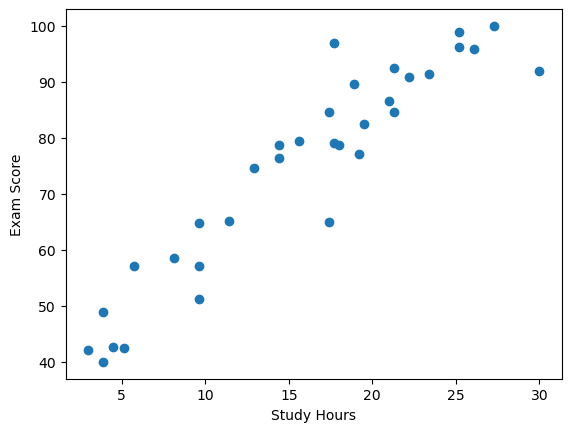

In [6]:
plt.scatter(df['Study Hours'],df['Exam Score'])
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()

In [7]:
X=df[['Study Hours']] # [[ data frame kalması için
y=df['Exam Score']

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y)

pandas.core.series.Series

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [12]:
y_train

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [13]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [14]:
# standardize the data set

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
df.head(5)

Study Hours  Exam Score
0          3.9        40.0
1          9.6        57.1
2          4.5        42.7
3         11.4        65.1
4         14.4        78.7

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train) # z
X_test = scaler.transform(X_test) # data leakage

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regression = LinearRegression() # LinearRegression(n_jobs=-1) hızlı çalıştırır

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
print("Coefficient: ", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient:  [16.17860223]
Intercept: 76.9076923076923


In [23]:
# y= 71.58 + 17.77 x

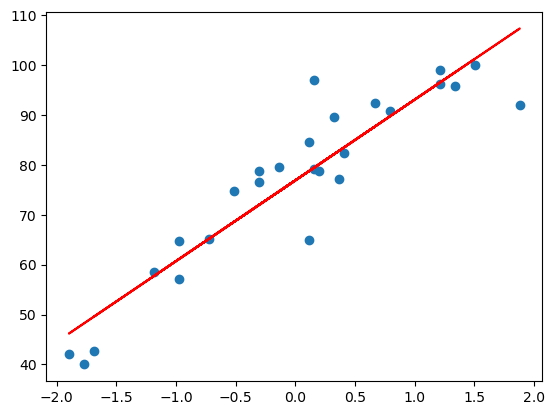

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train),"r")
plt.show()

In [25]:
# x=20, y=? 20 saat çalışan kaç puan alır

In [26]:
scaler.transform([[20]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [27]:
regression.predict(scaler.transform([[20]]))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [28]:
y_pred_test = regression.predict(X_test)

In [29]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

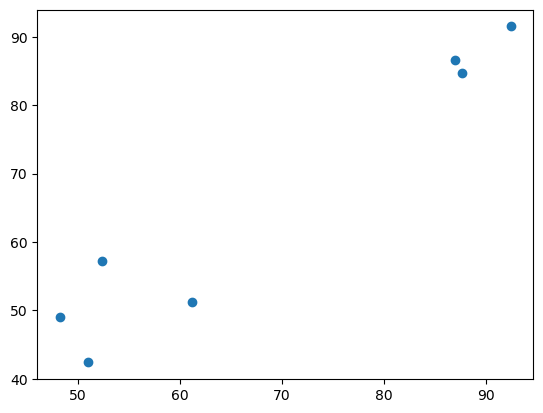

In [30]:
plt.scatter(y_pred_test, y_test)
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)


mse:  29.45839048833392
mae:  4.054868128856142
rmse:  5.427558427906043


In [33]:
r2 = r2_score(y_test, y_pred_test)
print("r2: ", r2)

r2:  0.9196596206825491


In [34]:
#adjusted R2-squared
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.903591544819059